# PARKER EQUATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
def LS(y, C, solution):
    return y**2 - 2*np.log(y) - solution - C

def PS(x):
    return 4*np.log(x) + 4*x**(-1)

[-4. -3. -2.]


C:\Users\admin\AppData\Local\Temp\ipykernel_14016\981960805.py:3: RuntimeWarning: invalid value encountered in log
  return y**2 - 2 * np.log(y) - 4 * np.log(x) - 4 / x - C


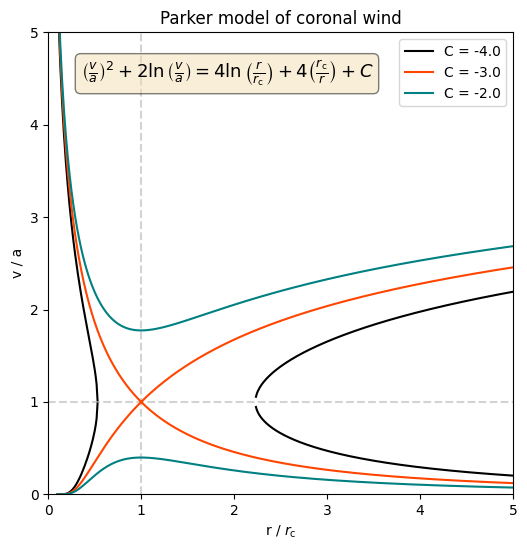

In [3]:
# Define the transcendental equation as a function
def equation(y, x, C):
    return y**2 - 2 * np.log(y) - 4 * np.log(x) - 4 / x - C

# Numerical solver to find y for a given x and C
def solve_for_y(x, C, y_initial):
    sol = root(equation, y_initial, args=(x, C), method='hybr')
    if sol.success:
        return sol.x[0]
    else:
        return np.nan

def solve_for_x(y, C, y_initial):
    sol = root(equation, y_initial, args=(y, C), method='hybr')
    if sol.success:
        return sol.x[0]
    else:
        return np.nan

# Values of x and C
x_values = np.linspace(1.000001, 6, 500) - 1  # Avoid x=1 to prevent log singularity
y_values = np.linspace(1.000001, 6, 500) - 1


colors = ['black', 'orangered','teal','green', 'magenta','gold','pink']
i = 0

# Plotting
plt.figure(figsize=(6, 6))

plt.plot((0,5), (1,1), '--', color='lightgray')
plt.plot((1,1), (0,5), '--', color='lightgray')

C_values = np.linspace(0, 2, 3) -4
print(C_values)
for C in C_values:
    col = colors[i]
    y_val = [solve_for_y(x, C, 5) for x in x_values]
    y_val2 = [solve_for_y(x, C, 0.000001) for x in x_values]
    plt.plot(x_values, y_val, color = col, label=f'C = {C}')
    plt.plot(x_values, y_val2, color = col)
    i += 1
    if i == 6:
        i=0
i=0

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(
    0.35, 4.5,
    r'$\left(\frac{v}{a}\right)^{2} + 2\ln{\left(\frac{v}{a}\right)} = 4\ln{\left(\frac{r}{r_{\mathrm{c}}}\right)} + 4\left(\frac{r_{\mathrm{c}}}{r}\right) + C$',
    fontsize=13, bbox=props
)

plt.ylabel('v / a')
plt.xlabel('r / $r_{\mathrm{c}}$')
plt.ylim(0,5)
plt.xlim(0,5)
plt.title('Parker model of coronal wind')
plt.legend()
#plt.savefig('parker_model.png',bbox_inches='tight')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14016\3331906346.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('inferno')  # You can replace 'viridis' with any other colormap
C:\Users\admin\anaconda3\envs\astro\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_14016\3331906346.py:9: RuntimeWarning: invalid value encountered in log
  return y**2 - 2 * np.log(y) - 4 * np.log(x) - 4 / x - C


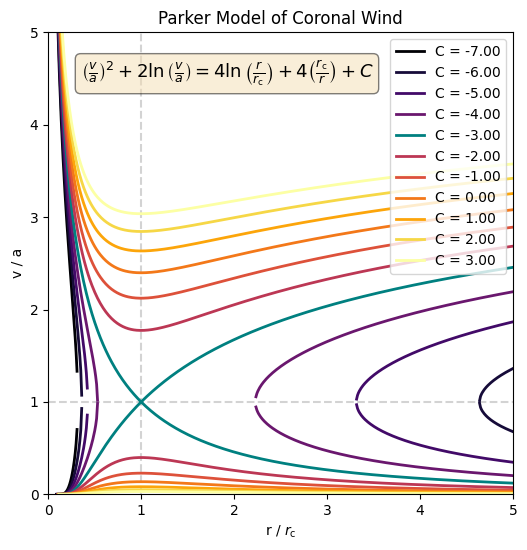

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import root
from matplotlib.animation import FuncAnimation

# Define the transcendental equation as a function
def equation(y, x, C):
    return y**2 - 2 * np.log(y) - 4 * np.log(x) - 4 / x - C

# Numerical solver to find y for a given x and C
def solve_for_y(x, C, y_initial):
    sol = root(equation, y_initial, args=(x, C), method='hybr')
    if sol.success:
        return sol.x[0]
    else:
        return np.nan

# Values of x and C
x_values = np.linspace(1.000001, 6, 500) - 1  # Avoid x=1 to prevent log singularity
colors2 = ['#BFB48F','#564E58','#904E55','#EB8258','#F2EFE9','#252627','#2F9C95','#F0A202','#CA61C3','#ED6A5E']

colormap = cm.get_cmap('inferno')  # You can replace 'viridis' with any other colormap
num_colors = 11
colors2 = [colormap(i / (num_colors - 1)) for i in range(num_colors)]

# Prepare figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot((0, 5), (1, 1), '--', color='lightgray')
ax.plot((1, 1), (0, 5), '--', color='lightgray')
ax.set_ylabel('v / a')
ax.set_xlabel('r / $r_{\mathrm{c}}$')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)
ax.set_title('Parker Model of Coronal Wind')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(
    0.35, 4.5,
    r'$\left(\frac{v}{a}\right)^{2} + 2\ln{\left(\frac{v}{a}\right)} = 4\ln{\left(\frac{r}{r_{\mathrm{c}}}\right)} + 4\left(\frac{r_{\mathrm{c}}}{r}\right) + C$',
    fontsize=13, bbox=props
)

# List of C values
C_values = np.linspace(0, 10, 11) - 7
lines = []

# Initialize plot with empty lines
for _ in C_values:
    line1, = ax.plot([], [], lw=2)  # Line for y_val
    line2, = ax.plot([], [], lw=2)  # Line for y_val2
    lines.append((line1, line2))

# Update function for animation
def update(frame):
    C = C_values[frame]
    col = colors2[frame % len(colors2)]
    if C == -3:
        col = 'teal'
    y_val = [solve_for_y(x, C, 5) for x in x_values]
    y_val2 = [solve_for_y(x, C, 0.000001) for x in x_values]
    lines[frame][0].set_data(x_values, y_val)
    lines[frame][0].set_color(col)
    lines[frame][0].set_label(f'C = {C:.2f}')
    
    lines[frame][1].set_data(x_values, y_val2)
    lines[frame][1].set_color(col)
    ax.legend(loc='upper right')

# Create animation
ani = FuncAnimation(fig, update, frames=len(C_values), repeat=False)

# Save or display the animation
ani.save('parker_model_animation.gif', writer='pillow', fps=2)
plt.show()